In [1]:
#Update seaborn if required
!pip install --upgrade seaborn

# Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

print(sns.__version__)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Print all columns in a dataframe
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

0.13.2


# Load csv into dataframe and analyse the data

In [3]:
#Read the csv file and preview the data
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape


(730, 16)

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
90%,657.100000,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,1872.000000,5895.400000,7293.800000
95%,693.550000,4.000000,1.000000,12.000000,0.000000,6.000000,1.000000,2.000000,31.520460,35.749975,86.868735,22.999988,2355.000000,6280.550000,7576.400000
99%,722.710000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,33.868050,38.941650,92.795857,27.380948,2931.680000,6787.390000,8163.810000


## Understand the data
<ul>
 <li>Datatypes</li>
 <li>Null values</li>
 <li>Unique non-null values</li>
 </ul>
    

In [7]:
for col in bikes.columns:
    print(col,'|', bikes[col].dtype, '|',bikes[col].isnull().sum(), '|', bikes[col].nunique(dropna=True))

instant | int64 | 0 | 730
dteday | object | 0 | 730
season | int64 | 0 | 4
yr | int64 | 0 | 2
mnth | int64 | 0 | 12
holiday | int64 | 0 | 2
weekday | int64 | 0 | 7
workingday | int64 | 0 | 2
weathersit | int64 | 0 | 3
temp | float64 | 0 | 498
atemp | float64 | 0 | 689
hum | float64 | 0 | 594
windspeed | float64 | 0 | 649
casual | int64 | 0 | 605
registered | int64 | 0 | 678
cnt | int64 | 0 | 695


In [8]:
#add cnt as first column and rename to Demand
demand=bikes.pop('cnt')
bikes.insert(0,'demand',demand)
bikes.head()

,demand,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,985,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,801,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [9]:
#convert object to date and extract week day
bikes['weekday']=bikes.dteday.apply(lambda d: pd.to_datetime(d).weekday())
bikes['weekday'].head()

0    0
1    3
2    3
3    6
4    1
Name: weekday, dtype: int64

In [10]:
#drop instant and dteday as it has all unique values
bikes=bikes.drop(['instant', 'dteday'], axis=1)
bikes.head()

,demand,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,985,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,801,1,0,1,0,3,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,1,0,1,0,6,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [11]:
#drop casual and registered as cnt is a sum of casual and registered and is highly correlated.
bikes=bikes.drop(['casual', 'registered'], axis=1)
bikes.head()

,demand,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,985,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882
1,801,1,0,1,0,3,0,2,14.902598,17.68695,69.6087,16.652113
2,1349,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703
3,1562,1,0,1,0,6,1,1,8.200000,10.60610,59.0435,10.739832
4,1600,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300


#Check for missing values
round(100*(bikes.isnull().sum()/len(bikes.index)),2)

In [12]:
# add weather mappings
bikes['weathersit']=bikes['weathersit'].apply(lambda x: 'clear' if x==1 else 'mist' if x==2 else 'lightsnow')

<Figure size 4000x1200 with 0 Axes>

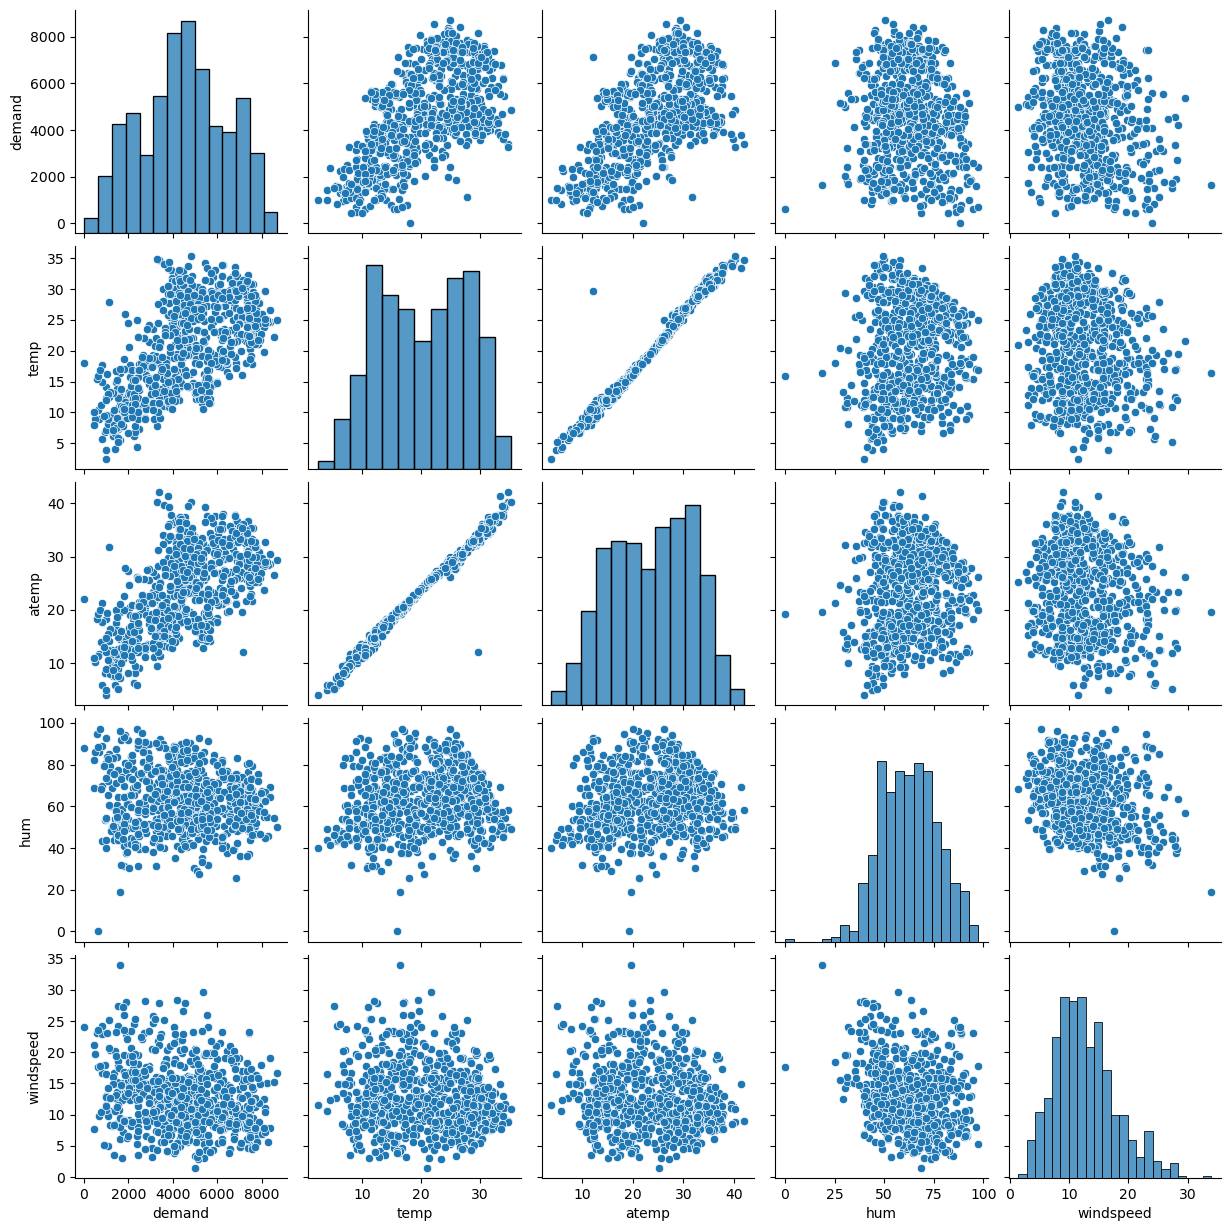

In [13]:
#Visualizing numerical variables
numvar= [ 'demand','temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(40,12))
sns.pairplot(bikes[numvar])
plt.show()

In [14]:
#defining reusable function

def plot(catvar,xtitle, position, ylabel='Demand', dependantvar='demand'):
    plt.subplot(4,2,position)
    sns.boxplot(x=catvar, y=dependantvar, data=bikes)
    plt.xlabel(xtitle)
    plt.ylabel(ylabel)
    plt.title(xtitle+" vs "+ylabel)
    return plt
    

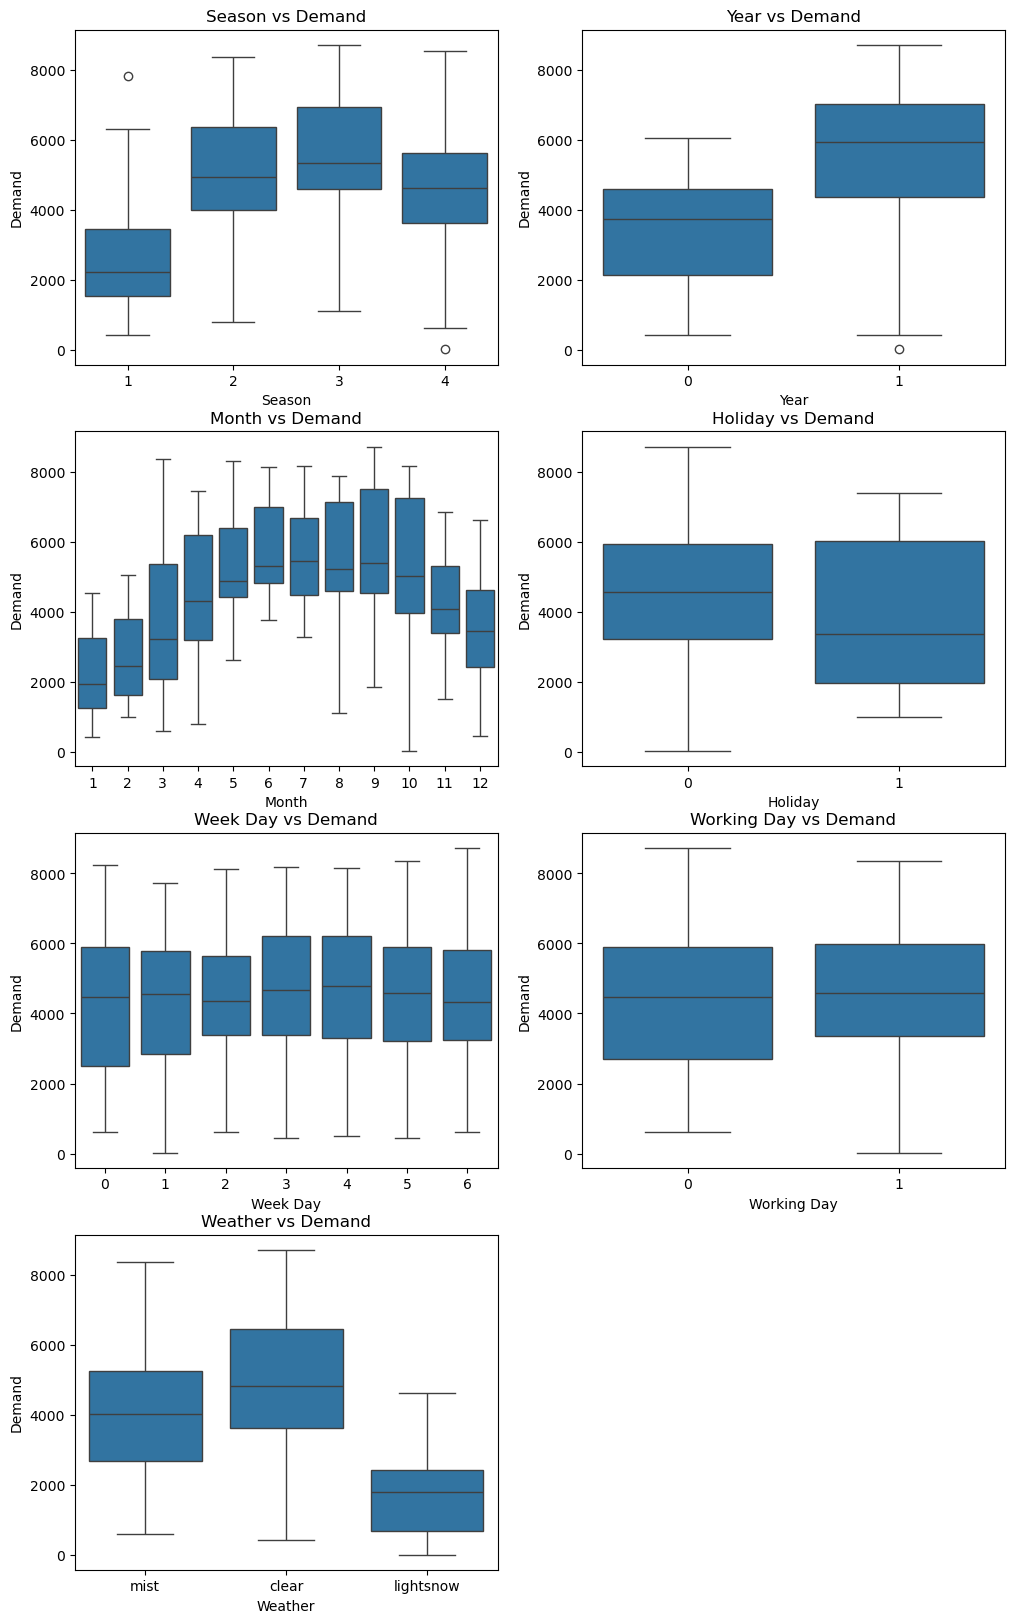

In [15]:
#Visualizing categorical variables
catvariables= [ 'season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(12,20))
plt=plot("season", "Season", 1)
plt=plot("yr", "Year", 2)
plt=plot("mnth", "Month", 3)
plt=plot("holiday", "Holiday", 4)
# Both weekday and workingday Doesn't seem to impact demand
plt=plot("weekday", "Week Day", 5)
plt=plot("workingday", "Working Day", 6)
plt=plot("weathersit", "Weather", 7)
plt.show()

In [16]:
#Convert categorical variable weathersit into dummy variables
weather=pd.get_dummies(bikes['weathersit'], drop_first=True)
bikes=pd.concat([bikes, weather], axis=1)


In [17]:
#Convert categorical variable season into dummy variables and rename columns
season=pd.get_dummies(bikes['season'], drop_first=True)

season.rename(columns = {1:'spring', 2:'summer', 
                              3:'fall', 4:'winter'}, inplace = True) 
bikes=pd.concat([bikes, season], axis=1)

In [18]:
#Convert categorical variable month into dummy variables
month=pd.get_dummies(bikes['mnth'], prefix='month',drop_first=True)
bikes=pd.concat([bikes, month], axis=1)

In [19]:

bikes=bikes.drop(['season','weathersit', 'mnth'], axis=1)
bikes.head()

,demand,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,lightsnow,mist,summer,fall,winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,985,0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,801,0,0,3,0,14.902598,17.68695,69.6087,16.652113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1349,0,0,3,1,8.050924,9.47025,43.7273,16.636703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1562,0,0,6,1,8.200000,10.60610,59.0435,10.739832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1600,0,0,1,1,9.305237,11.46350,43.6957,12.522300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
weekday=pd.get_dummies(bikes['weekday'], prefix='weekday',drop_first=True)
bikes=pd.concat([bikes, weekday], axis=1)

In [21]:
bikes=bikes.drop('weekday', axis=1)


In [22]:
bikes.head()

,demand,yr,holiday,workingday,temp,atemp,hum,windspeed,lightsnow,mist,summer,fall,winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,985,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,801,0,0,0,14.902598,17.68695,69.6087,16.652113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
# split the data into test and train
df_train, df_test=train_test_split(bikes, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [24]:
#scale all numberic columns
scaler = MinMaxScaler()
cols = ['temp','atemp', 'hum','windspeed']
df_train[cols]=scaler.fit_transform(df_train[cols])
df_train[cols].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883
std,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.542596,0.529718,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


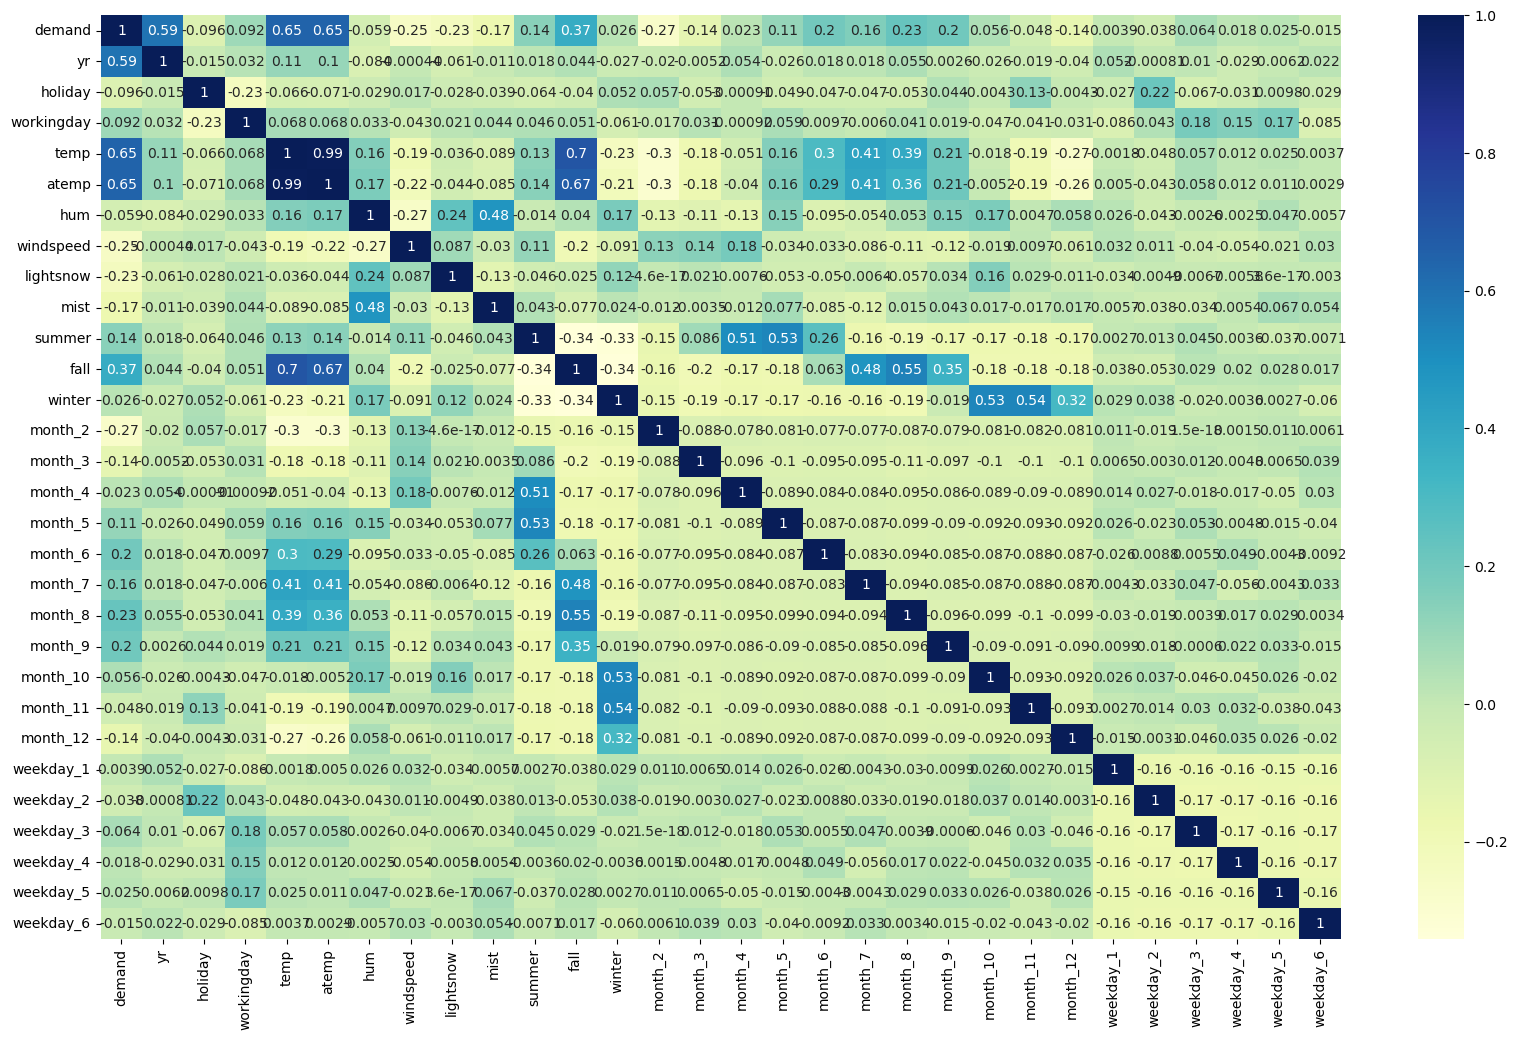

In [25]:
#find the correlation of variables on demand and plot as heat map
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr('pearson'), cmap='YlGnBu', annot=True)
plt.show()

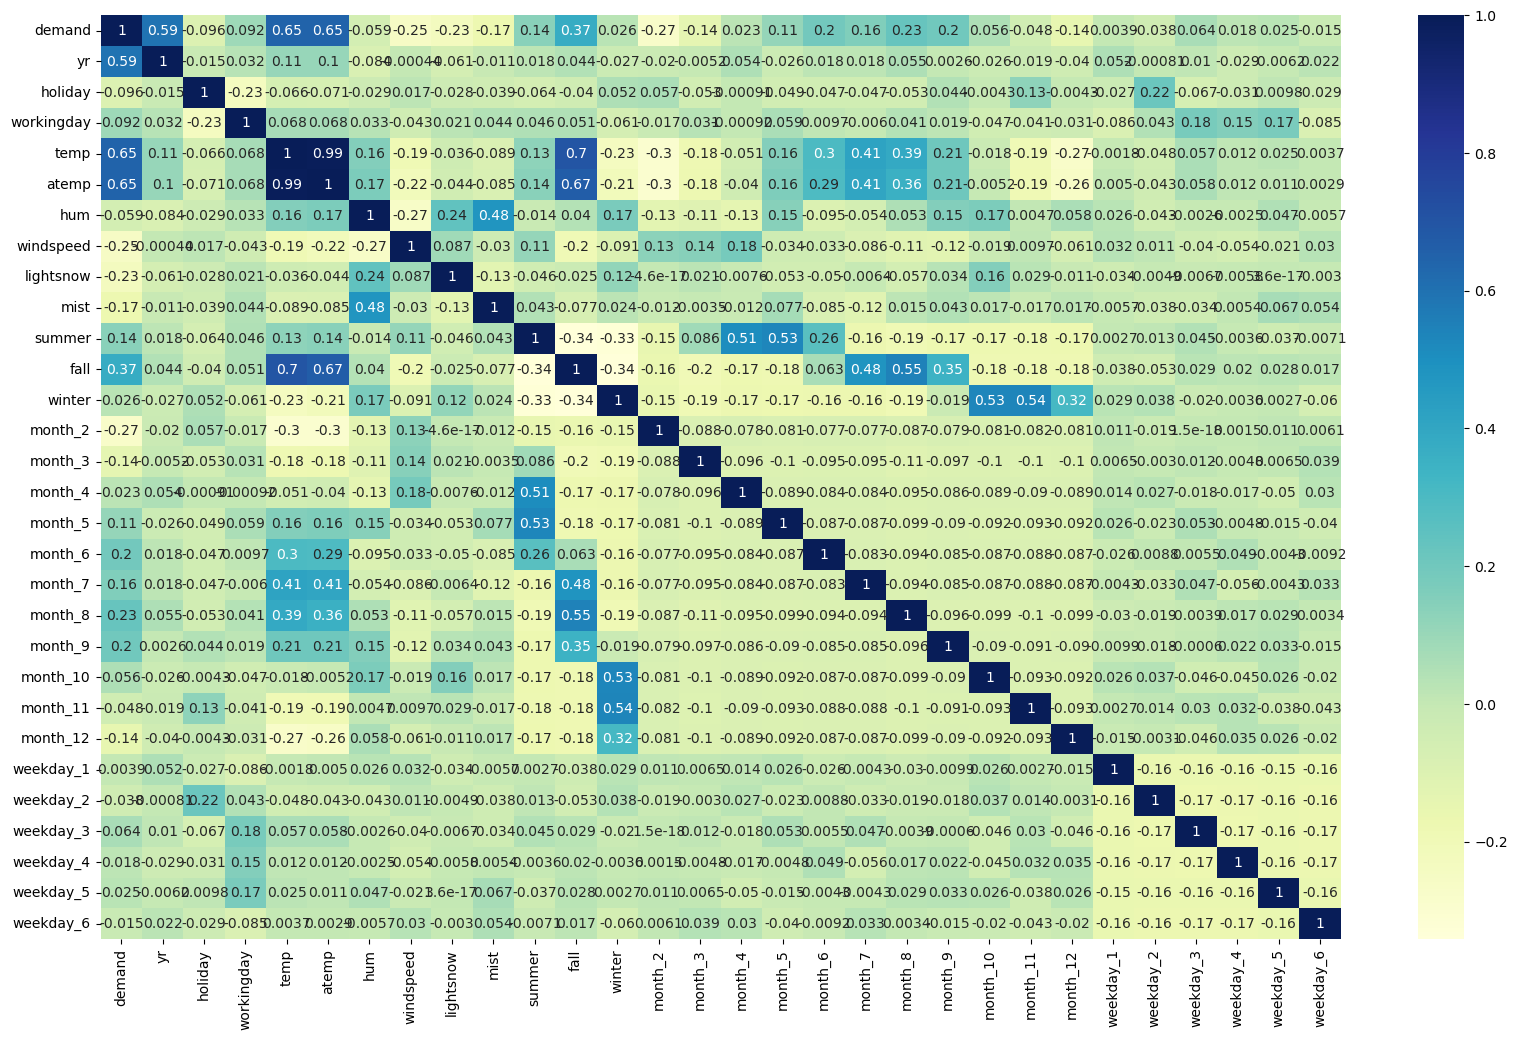

In [26]:
#find the correlation of variables on demand and plot as heat map
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [27]:
# create training data
y_train=df_train.pop('demand')
X_train=df_train

In [28]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,lightsnow,mist,summer,fall,winter,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
#Build the model
X_train=sm.add_constant(X_train)
lm=sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     93.03
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          9.35e-177
Time:                        09:10:52   Log-Likelihood:                -4104.9
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     480   BIC:                             8397.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1896.0988    262.161      7.233      0.0

In [30]:
# VIF to find correlation betweeb independent variables
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                          for i in range(len(X_train.columns))] 
  
print(vif_data)

       feature        VIF
0        const  57.513055
1           yr   1.056968
2      holiday   1.207991
3   workingday   1.385927
4         temp  67.094766
5        atemp  56.040216
6          hum   2.037733
7    windspeed   1.306587
8    lightsnow   1.286491
9         mist   1.593926
10      summer   6.756381
11        fall  11.329071
12      winter   8.160761
13     month_2   1.717154
14     month_3   2.877863
15     month_4   5.307698
16     month_5   6.595604
17     month_6   6.953948
18     month_7   8.877018
19     month_8   9.940981
20     month_9   6.742395
21    month_10   5.997197
22    month_11   5.535386
23    month_12   3.545130
24   weekday_1   1.694731
25   weekday_2   1.927570
26   weekday_3   1.958839
27   weekday_4   1.935238
28   weekday_5   1.925630
29   weekday_6   1.719719


In [31]:
#Use RFE to automate feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 16),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('lightsnow', True, 1),
 ('mist', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('month_2', False, 5),
 ('month_3', True, 1),
 ('month_4', False, 3),
 ('month_5', True, 1),
 ('month_6', False, 2),
 ('month_7', False, 7),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 8),
 ('month_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 10),
 ('weekday_3', False, 15),
 ('weekday_4', False, 14),
 ('weekday_5', False, 12),
 ('weekday_6', False, 13)]

In [33]:
columnsUsed = X_train.columns[rfe.support_]
columnsUsed

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'lightsnow', 'mist',
       'summer', 'fall', 'winter', 'month_3', 'month_5', 'month_8', 'month_9',
       'month_10'],
      dtype='object')

In [34]:
X_train_rfe = X_train[columnsUsed]

In [35]:
# Build model with revised set of features
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.00e-188
Time:                        09:10:53   Log-Likelihood:                -4111.8
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2085.3413    238.111      8.758      0.0

In [36]:
# Calculate VIF with revised set of features
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train_rfe.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) 
                          for i in range(len(X_train_rfe.columns))] 
  
print(vif_data)

      feature        VIF
0       const  47.519328
1          yr   1.038122
2     holiday   1.022335
3        temp   3.834200
4         hum   1.934945
5   windspeed   1.200829
6   lightsnow   1.263906
7        mist   1.560913
8      summer   2.826572
9        fall   6.487061
10     winter   2.362656
11    month_3   1.210247
12    month_5   1.556227
13    month_8   1.679897
14    month_9   1.397628
15   month_10   1.515566


# Reusable functions

In [37]:
#Reusable function to build model with revised features
def OLS(column_to_drop, X_train):
    X_train=X_train.drop(column_to_drop, axis=1)
    X_train=sm.add_constant(X_train)
    lm=sm.OLS(y_train,X_train).fit()
    print(lm.summary())
    return X_train

In [38]:
#reusable function to find VIF
def vif(X_train):
    vif_data = pd.DataFrame() 
    vif_data["feature"] = X_train.columns 

    # calculating VIF for each feature 
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) 
                              for i in range(len(X_train.columns))] 

    print(vif_data.sort_values(by="VIF", ascending=False))

# Reiterating - remove features and rebuild the model and check VIF

In [39]:
#Remove month_5 as p-value > 0,05
X_train_sm=OLS('month_5', X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.46e-189
Time:                        09:10:53   Log-Likelihood:                -4113.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     495   BIC:                             8320.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2040.6178    236.782      8.618      0.0

In [40]:
# Recalculate VIF after removing month_5
vif(X_train_sm)

      feature        VIF
0       const  46.848298
9        fall   6.288154
3        temp   3.715114
8      summer   2.661707
10     winter   2.325182
4         hum   1.902983
12    month_8   1.679454
7        mist   1.560682
14   month_10   1.511428
13    month_9   1.397196
6   lightsnow   1.260892
5   windspeed   1.198138
11    month_3   1.167678
1          yr   1.035301
2     holiday   1.021520


In [41]:
#Remove fall as p-value > 0,05
X_train_sm=OLS('fall', X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          5.94e-190
Time:                        09:10:53   Log-Likelihood:                -4114.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2043.6358    237.140      8.618      0.0

In [42]:
# Recalculate VIF after removing fall
vif(X_train_sm)

      feature        VIF
0       const  46.845297
4         hum   1.863440
9      winter   1.777488
3        temp   1.624608
7        mist   1.553169
13   month_10   1.483989
11    month_8   1.461922
8      summer   1.382612
12    month_9   1.246159
6   lightsnow   1.244282
5   windspeed   1.189209
10    month_3   1.120271
1          yr   1.027975
2     holiday   1.019801


In [43]:
#Remove month_3 as p-value > 0,05
X_train_sm=OLS('month_3', X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          1.49e-190
Time:                        09:10:53   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     497   BIC:                             8313.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2099.6201    235.076      8.932      0.0

In [44]:
# Recalculate VIF after removing month_3
vif(X_train_sm)

      feature        VIF
0       const  45.876586
4         hum   1.862670
9      winter   1.708944
3        temp   1.588405
7        mist   1.553105
12   month_10   1.483813
10    month_8   1.454225
8      summer   1.382584
6   lightsnow   1.242562
11    month_9   1.242057
5   windspeed   1.185070
1          yr   1.027811
2     holiday   1.016443


In [45]:
#Remove month_10 as p-value > 0,05
X_train_sm=OLS('month_10', X_train_sm)

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          7.50e-191
Time:                        09:10:53   Log-Likelihood:                -4117.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     498   BIC:                             8311.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2039.9270    234.004      8.717      0.0

In [46]:
# Recalculate VIF after removing month_10
vif(X_train_sm)

      feature        VIF
0       const  45.170159
4         hum   1.856981
7        mist   1.552847
3        temp   1.539015
10    month_8   1.440907
8      summer   1.374574
9      winter   1.318621
6   lightsnow   1.233052
11    month_9   1.210902
5   windspeed   1.181003
1          yr   1.027484
2     holiday   1.015933


In [47]:
# Fit the model with revised set of features
X_train=sm.add_constant(X_train_sm)
lm=sm.OLS(y_train,X_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          7.50e-191
Time:                        09:10:53   Log-Likelihood:                -4117.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     498   BIC:                             8311.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2039.9270    234.004      8.717      0.0

In [48]:
# Predict y values
y_train_pred=lm.predict(X_train)
y_train_pred

576    6307.680289
426    4246.662473
728    3348.430784
482    5248.592459
111    2338.939492
580    7084.743478
500    6921.763219
479    6428.760300
472    5498.312271
455    5093.858429
636    7694.988197
224    3983.636559
458    6528.893078
244    4567.691106
627    6696.212526
595    6135.777984
140    4855.113971
454    4716.340693
162    5040.952404
231    4966.529489
688    5459.494355
659    6770.934286
696    5310.132499
320    2692.006967
534    7148.763936
136    3283.178243
568    6581.024504
474    6190.168831
206    4802.153037
427    3940.388116
288    4367.855575
447    5138.857334
259    3524.299645
174    4398.081101
267    5913.041710
327    3024.561034
402    4601.001724
590    6881.650442
609    6986.740006
704    5191.328419
376    3704.342030
365    4227.623698
15     1777.239794
656    6179.067038
639    4781.737938
470    5913.636258
561    6698.284925
680    5336.414462
591    6869.339949
240    4611.064922
597    6780.181566
718    5057.716652
115    4155.

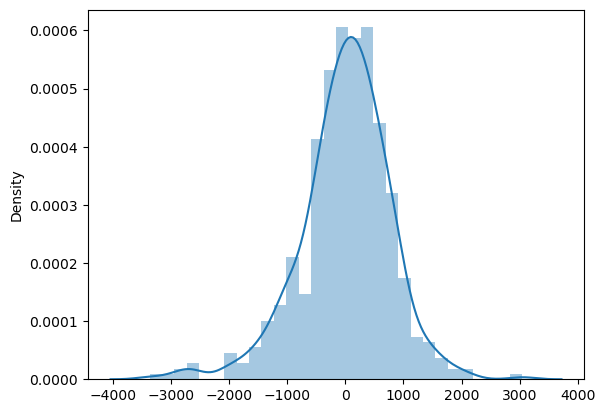

In [49]:
# plot distribution plot of residuals to check if it is normally distributed and mean is centered around zero
residuals = y_train-y_train_pred
sns.distplot(residuals)
plt.show()

In [50]:
#scale all test set numeric columns

cols = ['temp','atemp', 'hum','windspeed']
df_test[cols]=scaler.transform(df_test[cols])
df_test[cols].describe()

,temp,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293
std,0.233187,0.217401,0.148694,0.159584
min,0.046591,0.025950,0.261915,-0.042808
25%,0.355429,0.344870,0.529197,0.198843
50%,0.558172,0.544652,0.625590,0.300126
75%,0.755981,0.713308,0.743798,0.402718
max,0.984424,0.980934,1.002146,0.807474


In [51]:
# Assign y_test and X_test 
y_test=df_test.pop('demand')
X_test=df_test

In [52]:
X_train.head()

,const,yr,holiday,temp,hum,windspeed,lightsnow,mist,summer,winter,month_8,month_9
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,1,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,1,0,0,0


In [53]:
# get all columns from X train apart from const
cols=X_train.loc[:, X_train.columns != 'const']
print(cols.head())

     yr  holiday      temp       hum  windspeed  lightsnow  mist  summer  \
576   1        0  0.815169  0.725633   0.264686          0     0       0   
426   1        0  0.442393  0.640189   0.255342          0     1       0   
728   1        0  0.245101  0.498067   0.663106          0     0       0   
482   1        0  0.395666  0.504508   0.188475          0     1       1   
111   0        0  0.345824  0.751824   0.380981          0     1       1   

     winter  month_8  month_9  
576       0        0        0  
426       0        0        0  
728       0        0        0  
482       0        0        0  
111       0        0        0  


In [54]:
# add constant to test data
X_test_sm = X_test[cols.columns]
X_test_sm=sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,lightsnow,mist,summer,winter,month_8,month_9
184,1.0,0,1,0.831783,0.657364,0.084219,0,1,0,0,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,1,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,1,0,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,1,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,1,0,0,0


In [55]:
# predict on the test dataset
y_test_pred = lm.predict(X_test_sm)

In [56]:
# calculate the r2_square of train dataset
r2_score(y_true=y_train, y_pred=y_train_pred)

0.841031657532882

In [57]:
# calculate the r2_square of test dataset
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8051016394743412